In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


In [41]:
df = pd.read_csv('./postprocessed_data/usa-housing-dataset-with-states.csv')
print(df.columns)
print(df.head())
print(df.info())
print(df.describe())

Index(['Price', 'Bedrooms', 'Bathrooms', 'SquareFeet', 'YearBuilt',
       'GarageSpaces', 'LotSize', 'ZipCode', 'CrimeRate', 'SchoolRating',
       'State'],
      dtype='object')
    Price  Bedrooms  Bathrooms  SquareFeet  YearBuilt  GarageSpaces  LotSize  \
0  221958         1        1.9        4827       1979             2     1.45   
1  771155         2        2.0        1035       1987             2     1.75   
2  231932         1        3.0        2769       1982             1     1.46   
3  465838         3        3.3        2708       1907             3     1.62   
4  359178         4        3.4        1175       1994             2     0.74   

   ZipCode  CrimeRate  SchoolRating State  
0    82240      48.60             5    WY  
1    74315      92.03             9    OK  
2    79249      52.08             3    TX  
3    80587      61.65             1    CO  
4    20756      15.66             4    MD  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Da

In [42]:
# Age of home
df['Age'] = 2025 - df['YearBuilt']
df.drop('YearBuilt', axis=1, inplace=True)
df.dropna(inplace=True)
df.head()

,Price,Bedrooms,Bathrooms,SquareFeet,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating,State,Age
0,221958,1,1.9,4827,2,1.45,82240,48.60,5,WY,46
1,771155,2,2.0,1035,2,1.75,74315,92.03,9,OK,38
2,231932,1,3.0,2769,1,1.46,79249,52.08,3,TX,43
3,465838,3,3.3,2708,3,1.62,80587,61.65,1,CO,118
4,359178,4,3.4,1175,2,0.74,20756,15.66,4,MD,31


In [43]:
# encoder
encoder = OrdinalEncoder()
df['State'] = encoder.fit_transform(df['State'].values.reshape(-1, 1))

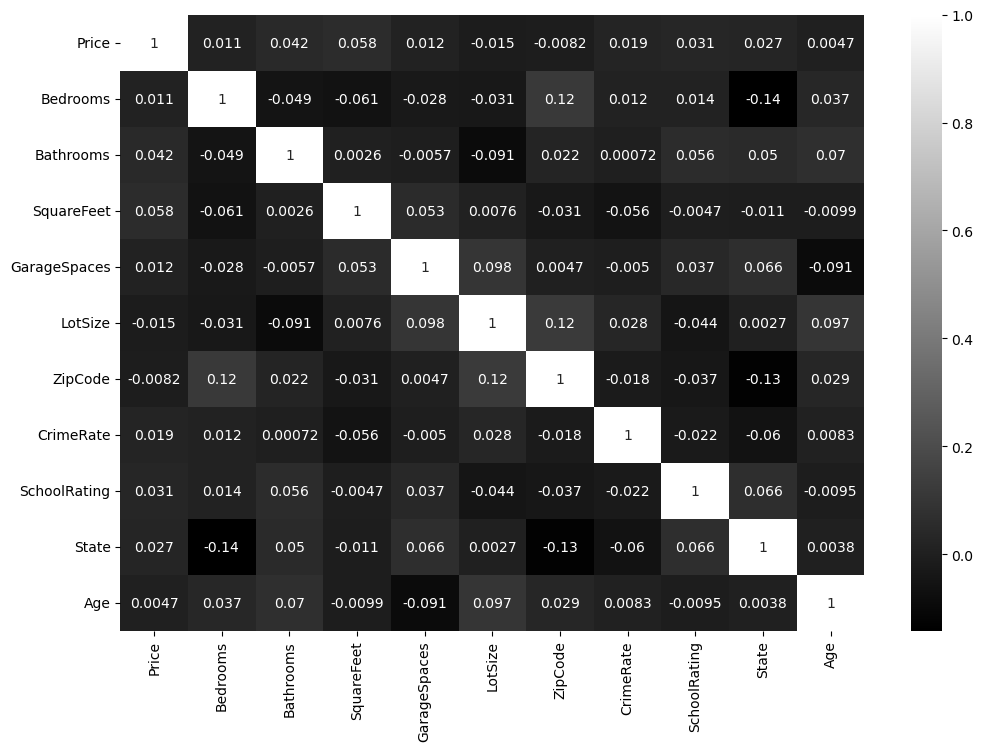

In [44]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='grey')
plt.show()

In [45]:
features = ['Bedrooms', 'Bathrooms', 'SquareFeet', 'Age', 'GarageSpaces', 'LotSize', 'CrimeRate', 'SchoolRating', "State"]
X = df[features]
y = df['Price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared Score: {r2_lr}")

Linear Regression Results:
Mean Squared Error: 70597692136.68445
R-squared Score: -0.033919157433573544


In [48]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared Score: {r2_rf}")


Random Forest Results:
Mean Squared Error: 71108152392.66861
R-squared Score: -0.04139496325380687


In [49]:
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print(f"XGBoost RMSE: {rmse}")
print("r2", r2_score(y_test, y_pred))

XGBoost RMSE: 80887792335.49518
r2 -0.18462000055551275


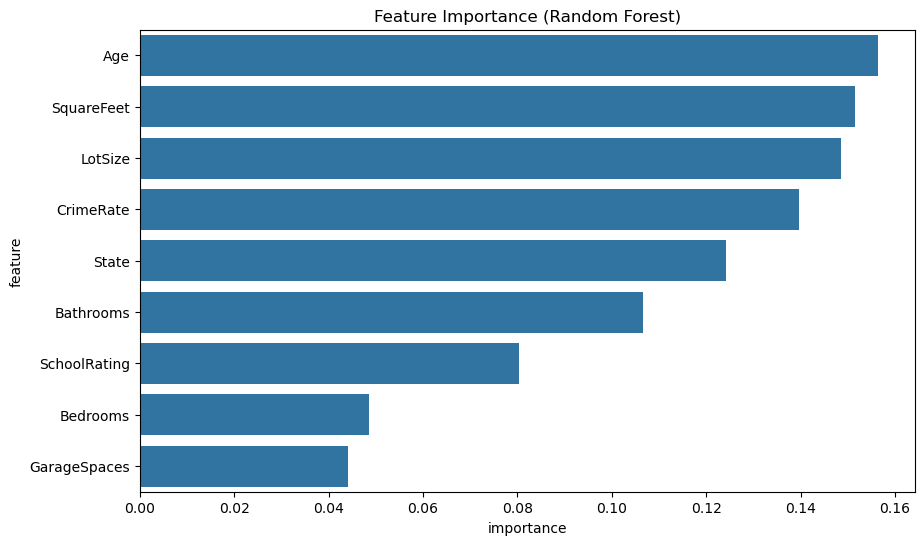

In [50]:
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

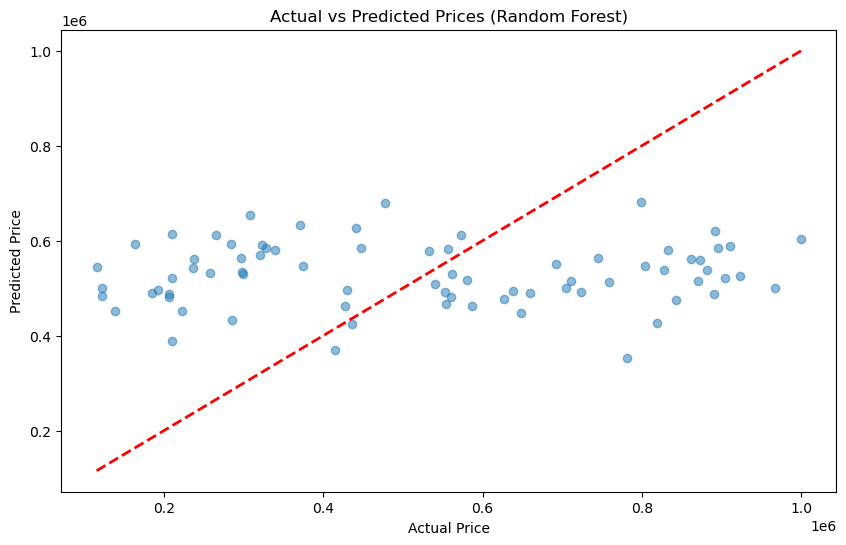

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()